In [1]:
%run Common.ipynb

In [2]:
import os.path
import pandas as pd

!pip install surprise
from surprise import Dataset, Reader
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate

np.set_printoptions(suppress=True,floatmode='maxprec_equal')

<h1>Question 7</h1>
<h3>Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$</h3>

<p>The mean is the sum of all ratings divided by number of ratings.</p>
<h3>$$\mu_u = \frac{1}{\lvert I_u\rvert}\sum_{k\in I_u}r_{uk}$$</h3>

<h1>Question 8</h1>

<h3>In plain words, explain the meaning of $I_u \cap I_v$.</h3>

<p>Set of item indices where ratings have been specified by both user u and v. In other word, a common set of ratings between both users.</p>

<h3>Can $I_u \cap I_v = \emptyset$?</h3>

<p>Yes, if both users never rated the same movies.</p>

<h1>Question 9</h1>

<h3>Can you explain the reason behind mean-centering the raw ratings $(r_{vj} - \mu_v)$ in the prediction function?</h3>

<p>Users provide ratings on different scale. Mean-centering the data would allow the users to be compared at the same scale.</p>

<h1>Question 10</h1>

In [3]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

In [4]:
sim_options = {'name': 'pearson',
               'user_based': True  # compute similarities between users
               }

In [5]:
k_list = np.linspace(2,100,50).astype(int)
k_list

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [6]:
cols = ['k','Avg RMSE', 'Avg MAE']

if os.path.isfile('q10_measures.pickle'):
    df_knn_measures = pickle_load('q10_measures.pickle')
    for k in log_progress(df_knn_measures.index):
        pass
else:
    df_knn_measures = pd.DataFrame(columns=cols)
    for k in log_progress(k_list):
        knn = KNNWithMeans(k=k, sim_options=sim_options)
        knn_cv = cross_validate(knn, data, cv=10, n_jobs=8)
        df_knn_measures = df_knn_measures.append({cols[0]:k,
                                          cols[1]:knn_cv['test_rmse'].mean(),
                                          cols[2]:knn_cv['test_mae'].mean()},
                                         ignore_index=True)
    df_knn_measures.set_index('k', inplace=True)
    pickle_write(df_knn_measures, 'q10_measures.pickle')

In [7]:
df_knn_measures[10:24]

Avg RMSE   Avg MAE
k                       
10.0  0.930420  0.712378
12.0  0.926281  0.707682
14.0  0.922612  0.704626
16.0  0.921577  0.704370
18.0  0.919582  0.701693
20.0  0.918779  0.701271
22.0  0.919393  0.701461
24.0  0.918889  0.700748

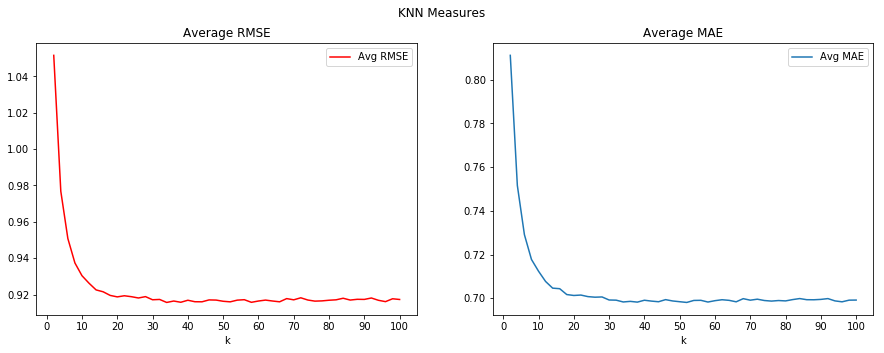

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("KNN Measures")
df_knn_measures[['Avg RMSE']].plot(ax=axes[0], title="Average RMSE", xticks=np.linspace(0,100,11), color='red')
_ = df_knn_measures[['Avg MAE']].plot(ax=axes[1], title="Average MAE", xticks=np.linspace(0,100,11))

<h1>Question 11</h1>

<h3>Minimum k = 18</h3>